In [1]:

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graphics-driver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [2]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

# download webdriver from https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/
# and put the executable in /usr/local/bin

In [3]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.protothema.gr/anazitisi/?q=%CE%BA%CE%BB%CE%B9%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE%20%CE%B1%CE%BB%CE%BB%CE%B1%CE%B3%CE%AE&Order=Related")


    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 5472
height: 7564
height: 10177
height: 12378
height: 14727
height: 17023
height: 19181
height: 21231
height: 23335
height: 25572
height: 27932
height: 30180
height: 32355
height: 34577
height: 36800
height: 39067
height: 41357
height: 43649
OK


In [4]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [5]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [6]:
print(len(stories_list))

190


In [7]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [8]:
df

,headline,url,date
0,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,https://www.protothema.gr/world/article/101991...,2020-06-23T20:44:00+03:00
1,\nΚλιματική αλλαγή στα Ιμαλάια\n,https://www.protothema.gr/environment/article/...,2010-02-05T12:34:24+02:00
2,\nΗ κλιματική αλλαγή δεν περιμένει\n,https://www.protothema.gr/afieromata/oloi-gia-...,2020-06-01T10:10:00+03:00
3,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,https://www.protothema.gr/world/article/105005...,2020-09-30T22:34:00+03:00
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",https://www.protothema.gr/world/article/114155...,2021-07-09T08:03:00+03:00
...,...,...,...
185,\nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...,https://www.protothema.gr/environment/article/...,2019-02-03T10:17:14+02:00
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,https://www.protothema.gr/politics/article/113...,2021-06-04T07:46:00+03:00
187,\nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...,https://www.protothema.gr/environment/article/...,2020-02-19T11:32:00+02:00
188,\nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...,https://www.protothema.gr/world/article/967794...,2020-01-23T18:10:00+02:00


In [9]:
df.sort_values(by='date', ascending = False)

,headline,url,date
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",https://www.protothema.gr/world/article/114155...,2021-07-09T08:03:00+03:00
153,\nΗ Κλιματική Αλλαγή θα κοστίσει στις χώρες τη...,https://www.protothema.gr/environment/article/...,2021-06-07T13:45:37+03:00
23,\nΟ άνθρωπος πίσω από την κλιματική αλλαγή\n,https://www.protothema.gr/afieromata/green-gre...,2021-06-04T09:00:00+03:00
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,https://www.protothema.gr/politics/article/113...,2021-06-04T07:46:00+03:00
5,\n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...,https://www.protothema.gr/environment/article/...,2021-06-03T06:24:13+03:00
...,...,...,...
109,"\nΙαπωνία: Xορήγηση 19,5 δισ. δολ. στα φτωχά κ...",https://www.protothema.gr/naked-city/genikes-e...,2009-12-17T05:53:35+02:00
32,\nΕκστρατεία για την κλιματική αλλαγή από δημά...,https://www.protothema.gr/naked-city/genikes-e...,2009-11-27T21:06:07+02:00
51,\nΝομοσχέδιο για την κλιματική αλλαγή ενέκρινε...,https://www.protothema.gr/naked-city/genikes-e...,2009-11-05T17:00:23+02:00
40,\nΗ κλιματική αλλαγή στο επίκεντρο συνάντησης ...,https://www.protothema.gr/naked-city/genikes-e...,2009-11-03T17:25:42+02:00


In [10]:

df.tail()


,headline,url,date
185,\nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...,https://www.protothema.gr/environment/article/...,2019-02-03T10:17:14+02:00
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,https://www.protothema.gr/politics/article/113...,2021-06-04T07:46:00+03:00
187,\nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...,https://www.protothema.gr/environment/article/...,2020-02-19T11:32:00+02:00
188,\nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...,https://www.protothema.gr/world/article/967794...,2020-01-23T18:10:00+02:00
189,\n«H κλιματική αλλαγή μπορεί να οδηγήσει σε κο...,https://www.protothema.gr/environment/article/...,2019-07-09T17:44:07+03:00


In [11]:
df.to_csv("klimatikiallagi.csv", index=False)

In [12]:
!pip install pandas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
with open('/content/drive/My Drive/klimatikiallagi.csv', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/klimatikiallagi.csv

Hello Google Drive!

In [16]:
df

,headline,url,date
0,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,https://www.protothema.gr/world/article/101991...,2020-06-23T20:44:00+03:00
1,\nΚλιματική αλλαγή στα Ιμαλάια\n,https://www.protothema.gr/environment/article/...,2010-02-05T12:34:24+02:00
2,\nΗ κλιματική αλλαγή δεν περιμένει\n,https://www.protothema.gr/afieromata/oloi-gia-...,2020-06-01T10:10:00+03:00
3,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,https://www.protothema.gr/world/article/105005...,2020-09-30T22:34:00+03:00
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",https://www.protothema.gr/world/article/114155...,2021-07-09T08:03:00+03:00
...,...,...,...
185,\nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...,https://www.protothema.gr/environment/article/...,2019-02-03T10:17:14+02:00
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,https://www.protothema.gr/politics/article/113...,2021-06-04T07:46:00+03:00
187,\nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...,https://www.protothema.gr/environment/article/...,2020-02-19T11:32:00+02:00
188,\nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...,https://www.protothema.gr/world/article/967794...,2020-01-23T18:10:00+02:00


In [17]:
df.head()

,headline,url,date
0,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,https://www.protothema.gr/world/article/101991...,2020-06-23T20:44:00+03:00
1,\nΚλιματική αλλαγή στα Ιμαλάια\n,https://www.protothema.gr/environment/article/...,2010-02-05T12:34:24+02:00
2,\nΗ κλιματική αλλαγή δεν περιμένει\n,https://www.protothema.gr/afieromata/oloi-gia-...,2020-06-01T10:10:00+03:00
3,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,https://www.protothema.gr/world/article/105005...,2020-09-30T22:34:00+03:00
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",https://www.protothema.gr/world/article/114155...,2021-07-09T08:03:00+03:00


στη σελίδα του πρώτου θέματος κάνω την αναζήτηση "κλιματική αλλαγή" και παίρνω τα άρθρα που αναφέρονται σε αυτό το θέμα.

In [18]:
df = df.drop('url', axis = 1)


In [19]:
df.shape

(190, 2)

In [20]:
pd.set_option("display.max_rows",110)



In [21]:
df

,headline,date
0,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,2020-06-23T20:44:00+03:00
1,\nΚλιματική αλλαγή στα Ιμαλάια\n,2010-02-05T12:34:24+02:00
2,\nΗ κλιματική αλλαγή δεν περιμένει\n,2020-06-01T10:10:00+03:00
3,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,2020-09-30T22:34:00+03:00
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",2021-07-09T08:03:00+03:00
...,...,...
185,\nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...,2019-02-03T10:17:14+02:00
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,2021-06-04T07:46:00+03:00
187,\nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...,2020-02-19T11:32:00+02:00
188,\nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...,2020-01-23T18:10:00+02:00


In [22]:
df.dtypes

headline    object
date        object
dtype: object

In [23]:
df['date'].astype(str)

0      2020-06-23T20:44:00+03:00
1      2010-02-05T12:34:24+02:00
2      2020-06-01T10:10:00+03:00
3      2020-09-30T22:34:00+03:00
4      2021-07-09T08:03:00+03:00
                 ...            
185    2019-02-03T10:17:14+02:00
186    2021-06-04T07:46:00+03:00
187    2020-02-19T11:32:00+02:00
188    2020-01-23T18:10:00+02:00
189    2019-07-09T17:44:07+03:00
Name: date, Length: 190, dtype: object

ημερομηνία ---> datetime

In [24]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', utc=True)

In [25]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [26]:
df.dtypes

headline                 object
date        datetime64[ns, UTC]
year                      int64
month                     int64
day                       int64
dtype: object

In [27]:
df

,headline,date,year,month,day
0,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,2020-06-23 17:44:00+00:00,2020,6,23
1,\nΚλιματική αλλαγή στα Ιμαλάια\n,2010-02-05 10:34:24+00:00,2010,2,5
2,\nΗ κλιματική αλλαγή δεν περιμένει\n,2020-06-01 07:10:00+00:00,2020,6,1
3,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,2020-09-30 19:34:00+00:00,2020,9,30
4,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",2021-07-09 05:03:00+00:00,2021,7,9
...,...,...,...,...,...
185,\nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...,2019-02-03 08:17:14+00:00,2019,2,3
186,\nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...,2021-06-04 04:46:00+00:00,2021,6,4
187,\nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...,2020-02-19 09:32:00+00:00,2020,2,19
188,\nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...,2020-01-23 16:10:00+00:00,2020,1,23


In [28]:
df.head

<bound method NDFrame.head of                                               headline  ... day
0    \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  ...  23
1                     \nΚλιματική αλλαγή στα Ιμαλάια\n  ...   5
2                 \nΗ κλιματική αλλαγή δεν περιμένει\n  ...   1
3    \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...  ...  30
4    \nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...  ...   9
..                                                 ...  ...  ..
185  \nΓκρέτα Τούνμπεργκ: Η 16χρονη που απεργεί κάθ...  ...   3
186  \nΤσίπρας: Η «πράσινη επανάσταση» του ΣΥΡΙΖΑ γ...  ...   4
187  \nΕκπέμπουν «SOS» οι επιστήμονες: Μη αναστρέψι...  ...  19
188  \nΗ Γκρέτα απαντά στον Μνούτσιν: Δεν χρειάζεσα...  ...  23
189  \n«H κλιματική αλλαγή μπορεί να οδηγήσει σε κο...  ...   9

[190 rows x 5 columns]>

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
df[df['year']==2020]['headline']

0      \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...
2                   \nΗ κλιματική αλλαγή δεν περιμένει\n
3      \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...
9      \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n
17     \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...
25     \nΝταβός: Παρεμβάσεις Βαρθολομαίου για την κλι...
44     \nΗ κλιματική αλλαγή θα αλλάξει τη γεύση της μ...
45     \nΈρευνα: Η κλιματική αλλαγή δυσκολεύει την απ...
56     \nΗ κλιματική αλλαγή «απειλεί» και την παραγωγ...
75     \nΚλιματική αλλαγή: Το 2019 έσπασε όλα τα ρεκό...
91     \nΠώς το παγκόσμιο lockdown επηρεάζει την κλιμ...
101    \nΤι θα πει η Λαγκάρντ για πληθωρισμό, κλιματι...
105    \nG20: Το τελικό κείμενο της συνόδου περιλαμβά...
113    \nΈρευνα: Όλο και περισσότεροι Αμερικανοί δηλώ...
119    \n«COVID-19 και κλιματική αλλαγή: Ιστορία δύο ...
122    \nΓκρέτα Τούνμπεργκ: Η κλιματική αλλαγή είναι ...
128    \nOHE: Ο κορωνοϊός δεν πρέπει να μας κάνει να ...
132    \nΕρυθρός Σταυρός: Κινδυ

In [31]:
headline =df[df['year']==2020]['headline'].str.cat(sep = ' ')

In [32]:
headline

'\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για την κλιματική αλλαγή \n \nΗ κλιματική αλλαγή δεν περιμένει\n \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά την κόντρα για την κλιματική αλλαγή\n \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη μελισσοκομία\n \nΝταβός: Παρεμβάσεις Βαρθολομαίου για την κλιματική αλλαγή\n \nΗ κλιματική αλλαγή θα αλλάξει τη γεύση της μπίρας\n \nΈρευνα: Η κλιματική αλλαγή δυσκολεύει την απογείωση των αεροπλάνων\n \nΗ κλιματική αλλαγή «απειλεί» και την παραγωγή κρασιού, λένε ερευνητές\n \nΚλιματική αλλαγή: Το 2019 έσπασε όλα τα ρεκόρ υψηλών θερμοκρασιών\n \nΠώς το παγκόσμιο lockdown επηρεάζει την κλιματική αλλαγή \n \nΤι θα πει η Λαγκάρντ για πληθωρισμό, κλιματική αλλαγή και ψηφιακά νομίσματα\n \nG20: Το τελικό κείμενο της συνόδου περιλαμβάνει για πρώτη φορά μία αναφορά στην κλιματική αλλαγή\n \nΈρευνα: Όλο και περισσότεροι Αμερικανοί δηλώνουν «τρομοκρατημένοι» από την κλιματική αλλαγή\n \n«COVID-19 και κλιματική αλλ

In [33]:
list(STOPWORDS)[0:20]

["she'd",
 'ought',
 "she'll",
 'most',
 'both',
 'her',
 'myself',
 "hasn't",
 'these',
 'he',
 'what',
 "who's",
 'also',
 "she's",
 'could',
 "let's",
 'only',
 'those',
 'had',
 'having']

In [34]:
import spacy

In [35]:
!python -m spacy download el_core_news_md


✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [36]:
nlp = spacy.load('el_core_news_md')

In [37]:
list(nlp.Defaults.stop_words)[0:20]

['κανένας',
 'ετούτοι',
 'συνεπώς',
 'αλλού',
 'οποίοι',
 'κατ',
 'ωσότου',
 'εκείνην',
 'ω',
 'πόσης',
 'οποιεσδήποτε',
 'όταν',
 'ύστερα',
 'εαυτούς',
 'ετούτην',
 'πούθε',
 'λοιπόν',
 'μετά',
 'εκείνων',
 'γρήγορα']

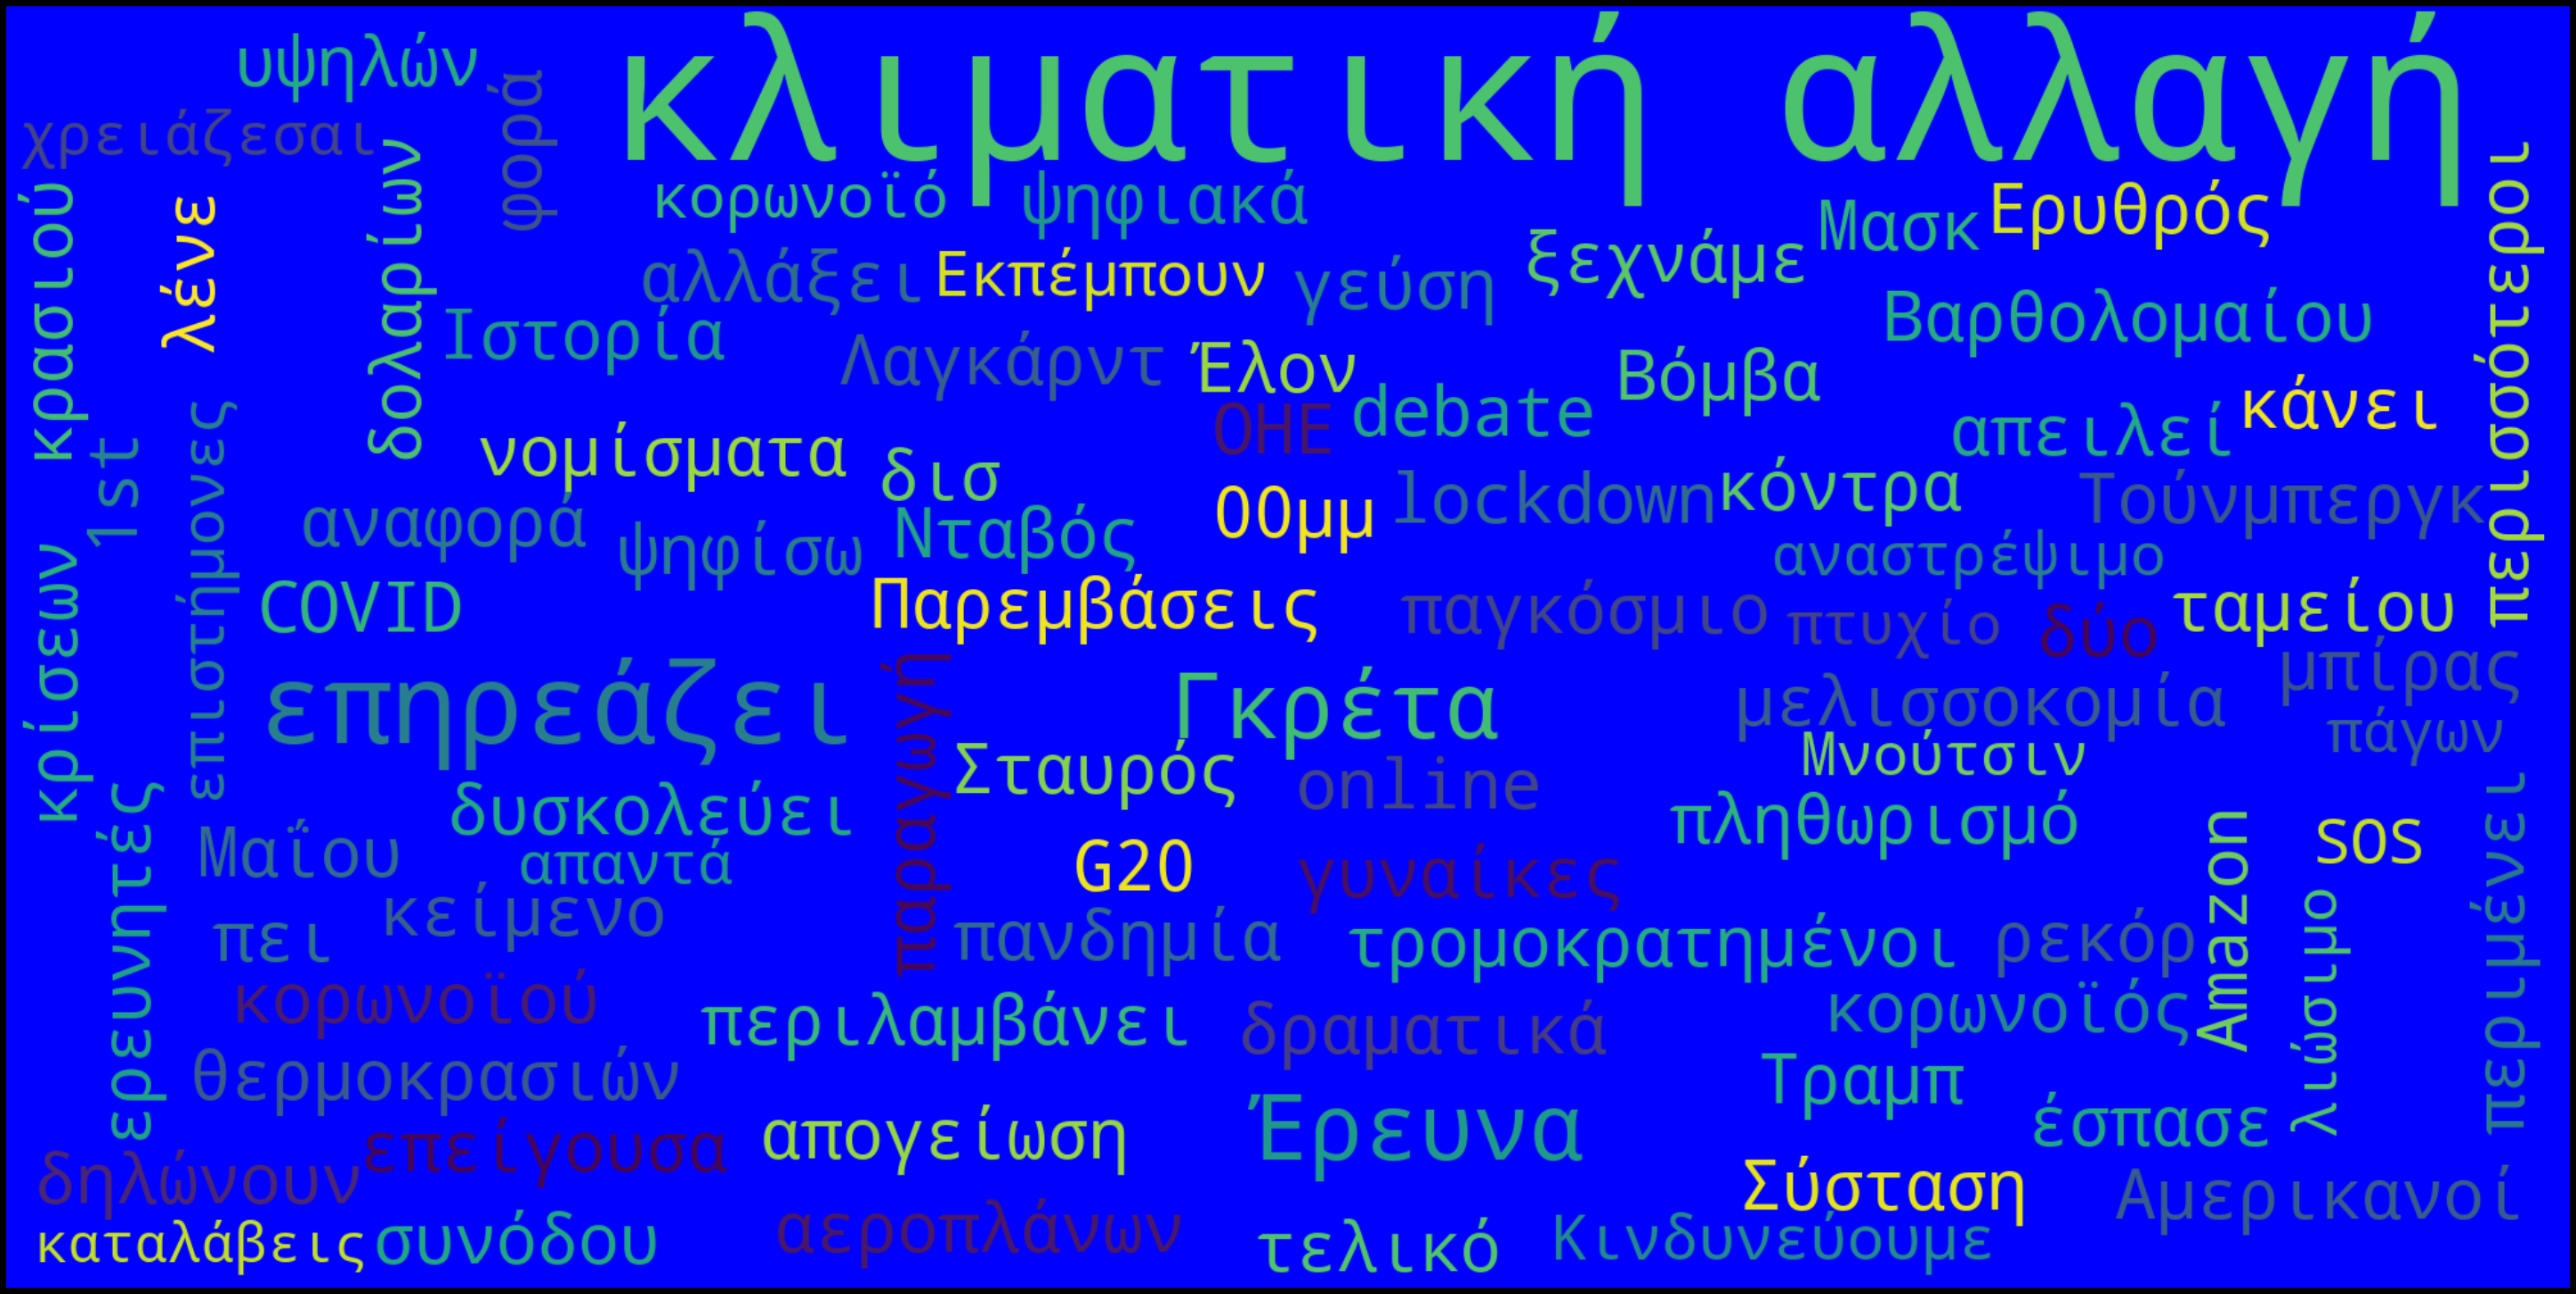

In [38]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(headline)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
df['headline'][1]

'\nΚλιματική αλλαγή στα Ιμαλάια\n'

In [40]:
doc = nlp(df['headline'][1])

In [41]:
for token in doc:
    print(token.text, "----", token.lemma_, "----",token.pos_)


 ---- 
 ---- SPACE
Κλιματική ---- κλιματικός ---- ADJ
αλλαγή ---- αλλαγή ---- NOUN
στα ---- στα ---- ADP
Ιμαλάια ---- ιμαλάια ---- X

 ---- 
 ---- SPACE


In [42]:
' '.join(token.lemma_ for token in doc)

'\n κλιματικός αλλαγή στα ιμαλάια \n'

In [43]:
headline

'\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για την κλιματική αλλαγή \n \nΗ κλιματική αλλαγή δεν περιμένει\n \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά την κόντρα για την κλιματική αλλαγή\n \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη μελισσοκομία\n \nΝταβός: Παρεμβάσεις Βαρθολομαίου για την κλιματική αλλαγή\n \nΗ κλιματική αλλαγή θα αλλάξει τη γεύση της μπίρας\n \nΈρευνα: Η κλιματική αλλαγή δυσκολεύει την απογείωση των αεροπλάνων\n \nΗ κλιματική αλλαγή «απειλεί» και την παραγωγή κρασιού, λένε ερευνητές\n \nΚλιματική αλλαγή: Το 2019 έσπασε όλα τα ρεκόρ υψηλών θερμοκρασιών\n \nΠώς το παγκόσμιο lockdown επηρεάζει την κλιματική αλλαγή \n \nΤι θα πει η Λαγκάρντ για πληθωρισμό, κλιματική αλλαγή και ψηφιακά νομίσματα\n \nG20: Το τελικό κείμενο της συνόδου περιλαμβάνει για πρώτη φορά μία αναφορά στην κλιματική αλλαγή\n \nΈρευνα: Όλο και περισσότεροι Αμερικανοί δηλώνουν «τρομοκρατημένοι» από την κλιματική αλλαγή\n \n«COVID-19 και κλιματική αλλ

In [44]:
full_doc = nlp(headline)

In [45]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [46]:
clear_text[1:764]

' amazon : σύσταση ταμείο 2 δισ. δολαρία για την κλιματικός αλλαγή \n \n η κλιματικός αλλαγή δεν περιμένω \n \n « βόμβα έλον Μασκ » : « ίσως ψηφίσω Τραμπ » παρά την κόντρα για την κλιματικός αλλαγή \n \n κλιματικός αλλαγή : πώς επηρεάζω τις γυναίκα ; \n \n η κλιματικός αλλαγή επηρεάζω δραματικά τη μελισσοκομία \n \n Νταβός : παρεμβάσει βαρθολομαίο για την κλιματικός αλλαγή \n \n η κλιματικός αλλαγή θα αλλάξω τη γεύση της μπίρα \n \n έρευνα : η κλιματικός αλλαγή δυσκολεύω την απογείωση των αεροπλάνο \n \n η κλιματικός αλλαγή « απειλώ » και την παραγωγή κρασί , λένε ερευνητής \n \n κλιματικός αλλαγή : το 2019 έσπασε όλος τα ρεκόρ υψηλός θερμοκρασία \n \n πώς το παγκόσμιος lockdown επηρεάζω την κλιματικός αλλαγή \n \n τι θα λέω η λαγκάρντ για πληθωρισμό , κλιματικός αλλαγή και ψ'

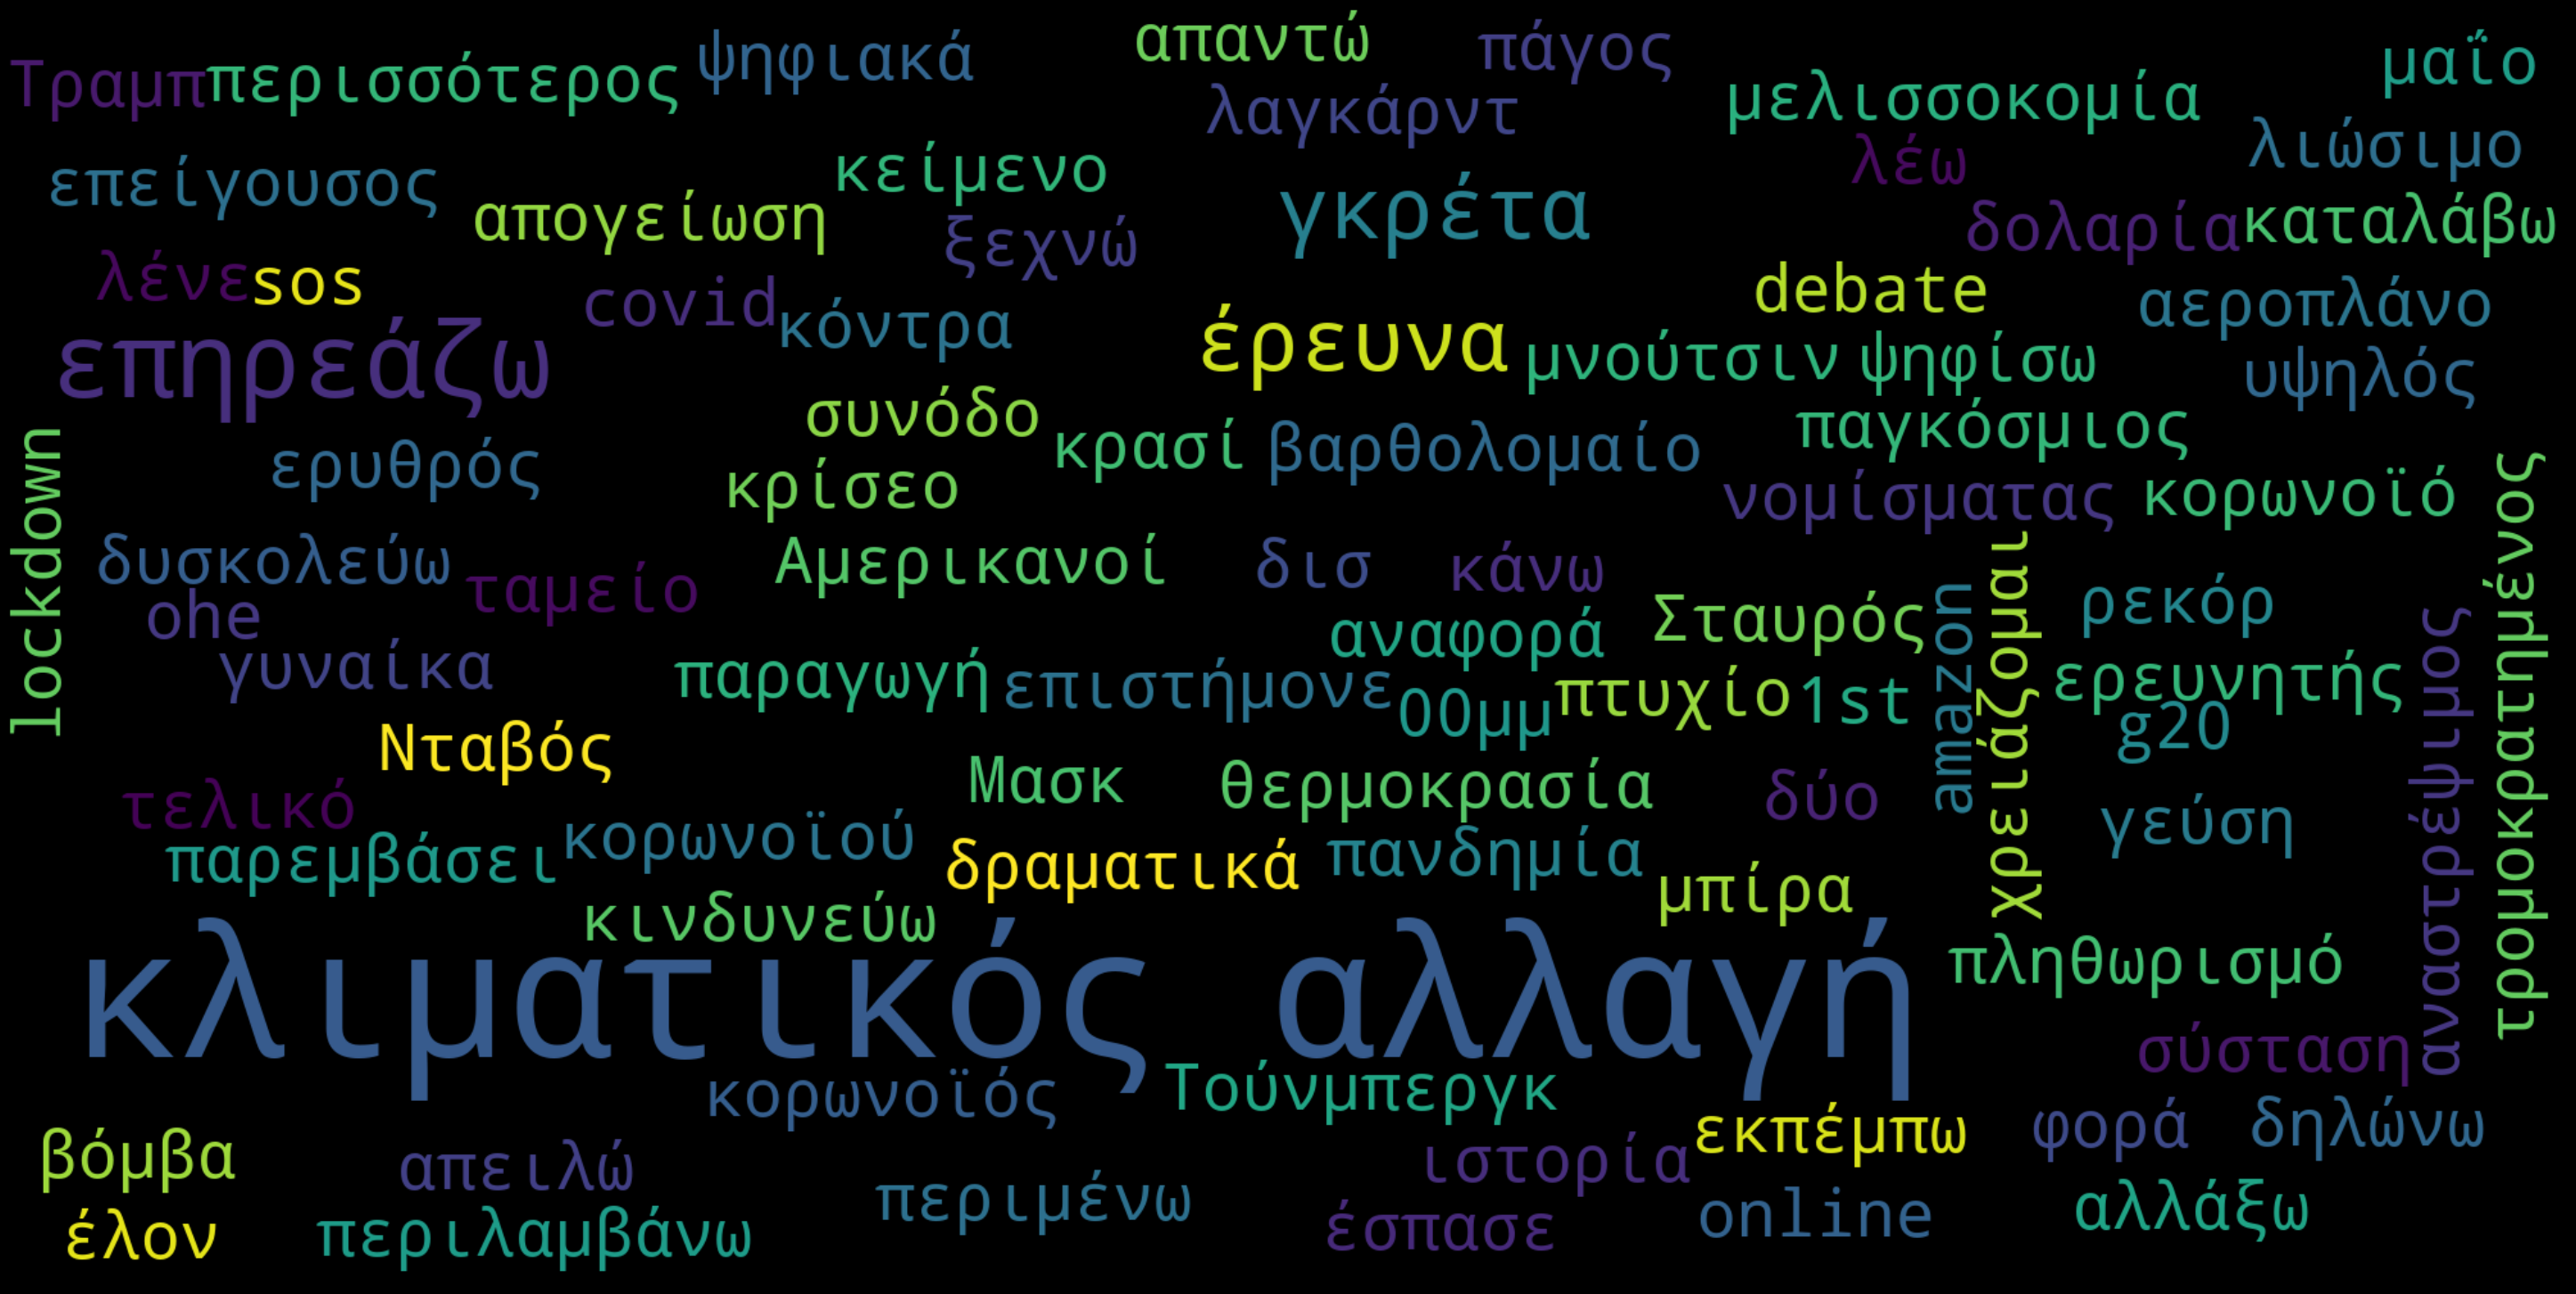

In [47]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Vectorize**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [49]:
count_vector = cv.fit_transform(df['headline'])

In [50]:
count_vector.shape

(190, 785)

In [51]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,00μμ,10,100,104,11,150,159,16,16χρονη,18,19,1st,20,2019,2020,2030,2100,23,28,300,315,421,500,700,830,amazon,bitcoin,breathe,ceo,china,covid,debate,der,ekτ,fake,g20,g7,greenpeace,in,...,φτωχά,φτωχών,φτώχεια,φυσικές,φυσικούς,φυτέψτε,φωτιά,φωτιές,φωτογραφίες,φύλο,χάθηκαν,χατζηδάκης,χειμερινούς,χειμώνα,χειμώνες,χειρότερους,χιλιάδες,χιόνι,χλμ,χρειάζεσαι,χρειαζόμαστε,χρόνια,χωρίς,χωρών,χόρεψε,χώρες,ψηθούμε,ψηφίσω,ψηφιακά,ψυχική,ωκεανών,όλα,όλο,όλον,όμως,όνειρα,όρο,όσοι,όσον,ότι
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [53]:
count_vector = cv.fit_transform(df['headline'])

In [54]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,150,19,2020,2100,700,sos,vid,άνθρωπο,άνθρωποι,άνθρωπος,έρευνα,έφερε,αθήνας,αλλάξει,αμερικανικό,ανησυχούν,αντιμετώπισή,απειλή,απειλεί,ασφάλεια,αυστραλία,βαρθολομαίος,γενοπ,γκέιτς,γκρέτα,δεη,διάσκεψη,διεθνής,δισ,δράση,δρόμους,δύο,εε,ειδικοί,εκατ,εκατομμύρια,εκστρατεία,ελλάδα,επηρεάζει,...,λιώνει,λονδίνο,μάχη,μήνες,μαθητική,μασκ,μεγαλύτερη,μειώνει,νέο,οηε,οικονομία,οικονομολόγοι,ομπάμα,παγκόσμιο,παιδιών,πανδημία,παραγωγή,παρισιού,περισσότεροι,πολίτες,πολιτικές,πορεία,πρίγκιπας,προειδοποιούν,πρόεδρος,σταδιακά,στόχους,συμφωνία,τούνμπεργκ,τραμπ,τσίπρας,τσιρώνης,υγεία,υπεύθυνη,φέρει,φέρνει,φταίει,χρόνια,χωρών,χώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df['headline'] = df['headline'].str.replace("βαρθολομαίος" ,"απειλεί").str.replace("ναι", "απειλή")

In [56]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) 
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(15)

,έρευνα,αλλαγή,απειλή,απειλεί,δισ,είαπειλή,ελλάδα,επιστήμονες,ευρώπη,ηπα,κάνει,κλιματική,κόσμο,λαγκάρντ,μεγαλύτερη,οηε,πορεία,προειδοποιούν,τραμπ,χώρες
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


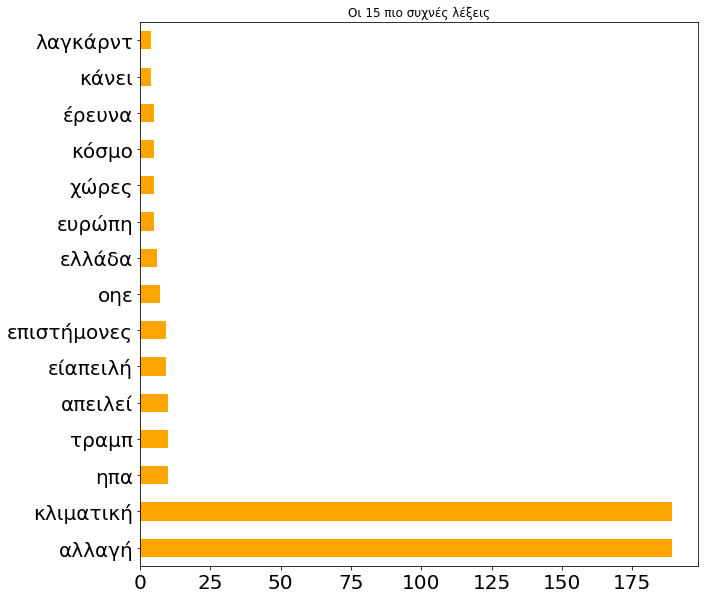

In [57]:
results.sum(axis =0).sort_values(ascending = False).head (15).plot(kind='barh',color='orange',figsize=(10,10),title='Οι 15 πιο συχνές λέξεις',fontsize=20)

In [58]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, 
                     ngram_range=(2, 2) )  
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,sos επιστήμονες,έρευνα κλιματική,αλλαγή 700,αλλαγή απειλεί,αλλαγή είαπειλή,αλλαγή επηρεάζει,αλλαγή επηρεάσει,αλλαγή καταστρέψει,αλλαγή μειώνει,βαρθολομαίος κλιματική,γκρέτα τούνμπεργκ,δράση κλιματική,κέντρο αθήνας,κινδύνου κλιματική,κλιματική αλλαγή,μαθητική πορεία,μεγαλύτερη απειλή,οηε κλιματική,πορεία κλιματική,πρίγκιπας κάρολος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


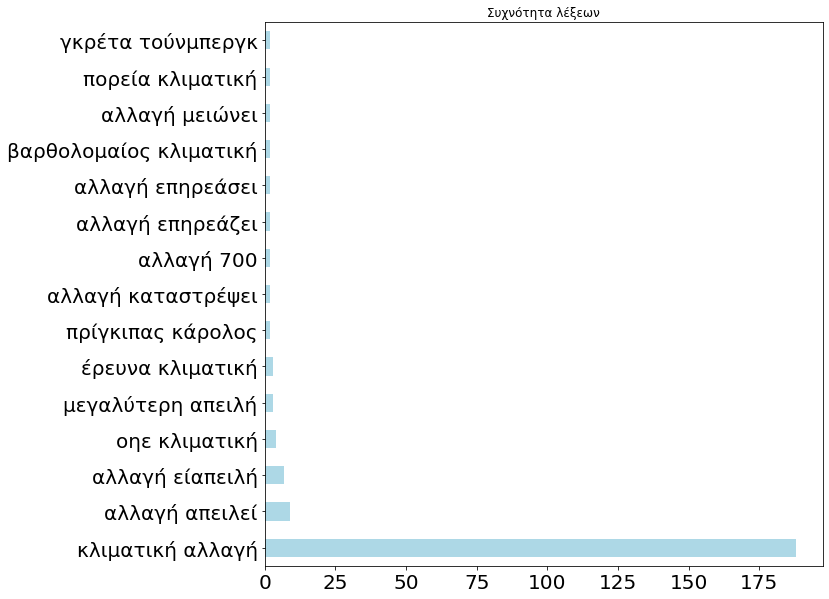

In [59]:
results.sum(axis =0).sort_values(ascending = False).head (15).plot(kind='barh',color='lightblue',figsize=(10,10),title='Συχνότητα λέξεων',fontsize=20)

In [60]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

κλιματική αλλαγή     188
αλλαγή απειλεί         9
αλλαγή είαπειλή        7
οηε κλιματική          4
μεγαλύτερη απειλή      3
dtype: int64

In [61]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     token_pattern = '\\bcov[a-z0-9-_]*\\b')  
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,covid-19
0,0
1,0
2,0
3,0
4,0


In [62]:
results.sum(axis =0).sort_values(ascending = False)

covid-19    1
dtype: int64

**Ομοιότητα**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['headline'])  #finds the tfidf score with normalization

In [65]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), 
                       columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,000,00μμ,10,100,104,11,150,159,16,16χρονη,19,1st,20,2019,2020,2030,2100,23,28,315,421,500,700,830,amazon,bitcoin,breathe,ceo,china,covid,debate,der,ekτ,fake,g20,g7,greenpeace,in,kλιματική,last,...,φέρνει,φαινόμενο,φασισμό,φιλιππίνες,φιλντ,φοβούνται,φορά,φρένο,φρενάρουν,φταίει,φτωχά,φτωχών,φτώχεια,φυσικές,φυσικούς,φυτέψτε,φωτιά,φωτιές,φωτογραφίες,φύλο,χάθηκαν,χατζηδάκης,χειμερινούς,χειμώνα,χειμώνες,χειρότερους,χιλιάδες,χιόνι,χλμ,χρειάζεσαι,χρειαζόμαστε,χρόνια,χωρών,χόρεψε,χώρες,ψηθούμε,ψηφίσω,ψηφιακά,ψυχική,ωκεανών
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.515511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484217,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.1318318  0.03266228 0.01632459 0.01602115 0.01315266
  0.01695881 0.01672056 0.02345852 0.03697026 0.1318318  0.02711319
  0.03859801 0.02102906 0.02102906 0.02942975 0.02055153 0.02491096
  0.02523886 0.01925569 0.03266228 0.03505647 0.02345852 0.03505647
  0.02345852 0.01925569 0.01701732 0.01771359 0.02578726 0.02055153
  0.02429991 0.02073449 0.02843653 0.02429991 0.01928762 0.02064976
  0.01971293 0.01919115 0.01672056 0.02345852 0.01971293 0.02055153
  0.0217367  0.01737962 0.02429991 0.02578726 0.03266228 0.0145875
  0.01925569 0.01820857 0.01784254 0.02711319 0.01733047 0.01925569
  0.02345852 0.02020436 0.01936404 0.01925569 0.01971293 0.01971293
  0.02429991 0.02055153 0.02287696 0.02491096 0.01971293 0.01701732
  0.01789204 0.02641577 0.03266228 0.02112822 0.01925569 0.02429991
  0.01795675 0.02003497 0.01672056 0.01925569 0.01602115 0.02020436
  0.01971293 0.02173149 0.01701732 0.02711319 0.02711319 0.01737962
  0.02763499 0.03859801 0.0242

In [67]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.1318318  0.03266228 ... 0.01618973 0.01533763 0.01368903]
 [0.1318318  1.         0.24775722 ... 0.12280595 0.1163424  0.10383711]
 [0.03266228 0.24775722 1.         ... 0.03042606 0.02882467 0.0257264 ]
 ...
 [0.01618973 0.12280595 0.03042606 ... 1.         0.01428754 0.01275182]
 [0.01533763 0.1163424  0.02882467 ... 0.01428754 1.         0.01208066]
 [0.01368903 0.10383711 0.0257264  ... 0.01275182 0.01208066 1.        ]]


In [68]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

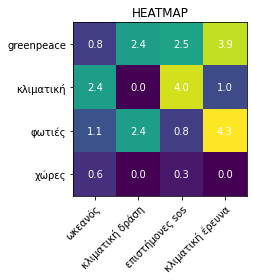

In [69]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

group1 = ["greenpeace", "κλιματική", "φωτιές", "χώρες"]
group2 = ['ωκεανός','κλιματική δράση','επιστήμονες sos','κλιματική έρευνα']

diff = np.array([[0.8, 2.4, 2.5, 3.9],
                    [2.4, 0.0, 4.0, 1.0],
                    [1.1, 2.4, 0.8, 4.3],
                    [0.6, 0.0, 0.3, 0.0],])


fig, ax = plt.subplots()
im = ax.imshow(diff)

# We want to show all ticks...
ax.set_xticks(np.arange(len(group1)))
ax.set_yticks(np.arange(len(group2)))
# ... and label them with the respective list entries
ax.set_xticklabels(group2)
ax.set_yticklabels(group1)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(group2)):
    for j in range(len(group1)):
        text = ax.text(j, i, diff[i, j],
                       ha="center", va="center", color="w")

ax.set_title("HEATMAP")
fig.tight_layout()
plt.show()

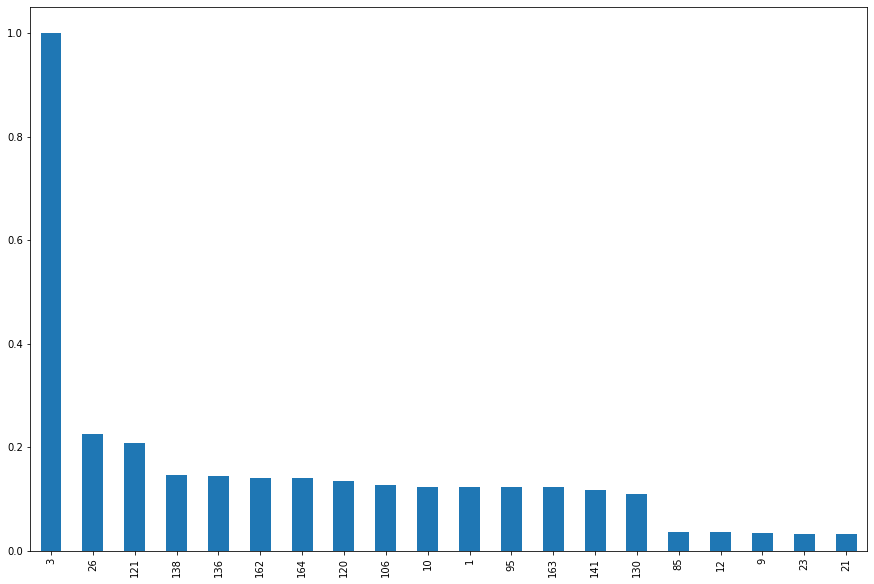

In [70]:
#pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize=(15,10))

αρθρα που εντοπίζονται καθε έτος

In [71]:
df['year'].value_counts()

2019    41
2017    22
2018    21
2020    20
2021    18
2013    14
2015    12
2016    11
2014     9
2010     8
2011     5
2012     4
2009     4
2008     1
Name: year, dtype: int64

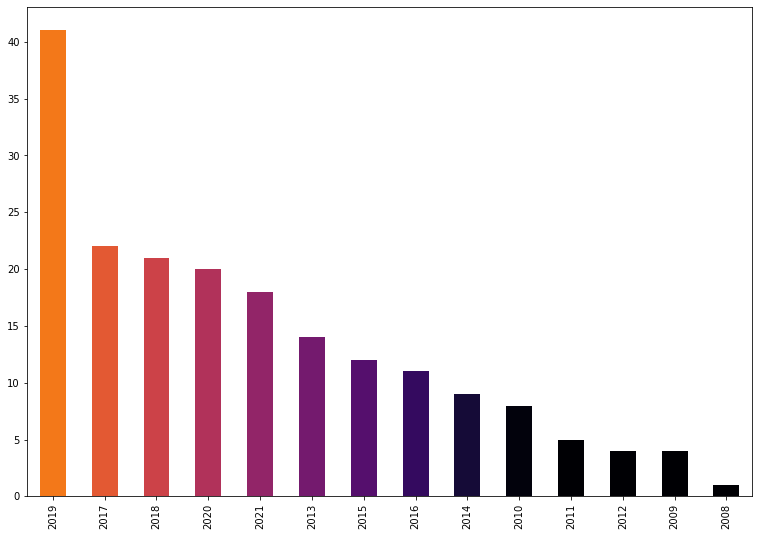

In [72]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4))
color

df['year'].value_counts(sort=True).plot(kind='bar', color=color, legend=False, figsize=(13, 9))

In [73]:
from google.colab import files
# Save Figure
plt.savefig("year.png")

# Save Transparent Figure
plt.savefig("year.png", transparent=True)

<Figure size 432x288 with 0 Axes>

In [74]:
df.dtypes

headline                 object
date        datetime64[ns, UTC]
year                      int64
month                     int64
day                       int64
dtype: object

In [75]:
df = df.set_index(pd.DatetimeIndex(df['date']))

In [76]:
df.head()

,headline,date,year,month,day
date,,,,,
2020-06-23 17:44:00+00:00,\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...,2020-06-23 17:44:00+00:00,2020,6,23
2010-02-05 10:34:24+00:00,\nΚλιματική αλλαγή στα Ιμαλάια\n,2010-02-05 10:34:24+00:00,2010,2,5
2020-06-01 07:10:00+00:00,\nΗ κλιματική αλλαγή δεν περιμένει\n,2020-06-01 07:10:00+00:00,2020,6,1
2020-09-30 19:34:00+00:00,\n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...,2020-09-30 19:34:00+00:00,2020,9,30
2021-07-09 05:03:00+00:00,"\nΠανδημία, κλιματική αλλαγή και συρράξεις «εκ...",2021-07-09 05:03:00+00:00,2021,7,9


**ανάλυση συναισθημάτων**

In [77]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 7.5MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=8bf48226ed310bf40a418964a212c0cba905b84c90a9bcf5c0bf6c7d9162a1ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-g0wb735u/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [79]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

emolex

In [80]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head

<bound method NDFrame.head of                   word  Positive  Negative  ...  Sadness  Surprise  Trust
0                αφεση       1.0       0.0  ...      0.0       0.0    0.0
1      ενορκη βεβαιωση       0.0       0.0  ...      0.0       0.0    0.0
2              εχοντας       0.0       0.0  ...      0.0       0.0    0.0
3                  εχω       0.0       0.0  ...      0.0       0.0    0.0
4                 οριο       0.0       0.0  ...      0.0       0.0    0.0
...                ...       ...       ...  ...      ...       ...    ...
13166        ουρλιασμα       0.0       1.0  ...      0.0       1.0    0.0
13167     κροκος αυγου       0.0       0.0  ...      0.0       0.0    0.0
13168         νεοτερος       1.0       0.0  ...      0.0       0.0    0.0
13169          ζεφυρος       0.0       0.0  ...      0.0       0.0    0.0
13170             ζουμ       0.0       0.0  ...      0.0       0.0    0.0

[13171 rows x 11 columns]>

In [81]:
emolex_df.tail(10)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13161,κλητηριο ενταλμα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13162,κατειργασμενος,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13163,μαγια,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13164,κιτρινο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13165,κιτρινιζω,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [83]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
import spacy
nlp = spacy.load('el_core_news_sm')

tweets greenpeace 

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [88]:
tweets_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/greenpeace_tweets.tsv", sep='\t')

In [89]:
len(tweets_df)

3250

In [90]:
short_tweets = tweets_df[['created_at','full_text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [91]:
short_tweets.tail()

,date,text
3245,Tue Sep 25 10:02:34 +0000 2018,"Σήμερα στην Ινδονησία, ακτιβιστές μας σταμάτησ..."
3246,Tue Sep 25 07:30:00 +0000 2018,Έχεις ακούσει ότι μειώνεται ο πληθυσμός των με...
3247,Mon Sep 24 18:00:01 +0000 2018,Οι άνθρωποι της Ηπείρου αντιστέκονται στις εξο...
3248,Mon Sep 24 14:09:55 +0000 2018,Η αξιοποίηση του ήλιου είναι η λύση για την εν...
3249,Mon Sep 24 12:05:33 +0000 2018,RT @Greenpeace: What happens in the Arctic aff...


In [92]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [93]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [94]:
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [95]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [96]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")


In [97]:
short_tweets.head()


,date,text
0,2021-07-04 06:43:00,Το μέλλον που χτίζουμε πρέπει να έχει την προσ...
1,2021-07-03 10:02:30,Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...
2,2021-07-03 08:00:07,Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...
3,2021-07-03 07:57:12,Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...
4,2021-07-03 06:24:15,"Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,..."


In [98]:
short_tweets.head()

,date,text
0,2021-07-04 06:43:00,Το μέλλον που χτίζουμε πρέπει να έχει την προσ...
1,2021-07-03 10:02:30,Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...
2,2021-07-03 08:00:07,Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...
3,2021-07-03 07:57:12,Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...
4,2021-07-03 06:24:15,"Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,..."


In [99]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [100]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
wordcount_df.shape

(3250, 13161)

In [102]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [104]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [105]:
short_tweets.head(3)

,date,text
0,2021-07-04 06:43:00,Το μέλλον που χτίζουμε πρέπει να έχει την προσ...
1,2021-07-03 10:02:30,Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...
2,2021-07-03 08:00:07,Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...


In [106]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [107]:
short_tweets


,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-07-04 06:43:00,Το μέλλον που χτίζουμε πρέπει να έχει την προσ...,0,2,1,1,0,1,1,0,1,0
1,2021-07-03 10:02:30,Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...,1,0,0,0,0,0,0,1,1,0
2,2021-07-03 08:00:07,Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...,1,0,0,1,1,0,0,1,1,1
3,2021-07-03 07:57:12,Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...,2,2,0,0,0,0,0,0,3,2
4,2021-07-03 06:24:15,"Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,...",0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,2018-09-25 10:02:34,"Σήμερα στην Ινδονησία, ακτιβιστές μας σταμάτησ...",0,0,0,0,0,0,1,0,0,0
3246,2018-09-25 07:30:00,Έχεις ακούσει ότι μειώνεται ο πληθυσμός των με...,0,1,0,0,0,0,0,0,1,0
3247,2018-09-24 18:00:01,Οι άνθρωποι της Ηπείρου αντιστέκονται στις εξο...,1,1,0,0,0,0,0,1,1,1
3248,2018-09-24 14:09:55,Η αξιοποίηση του ήλιου είναι η λύση για την εν...,1,1,0,1,0,0,1,1,2,1


In [108]:
short_tweets.set_index('date' , inplace=True)

**ΟΜΑΔΟΠΟΙΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ**

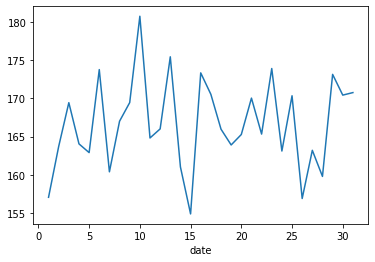

In [109]:
short_tweets['text'].str.len().groupby(by=short_tweets.index.day).mean().plot()


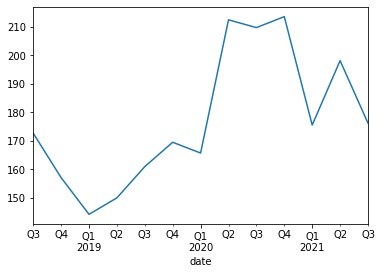

In [110]:
short_tweets['text'].str.len().resample('Q').mean().plot()

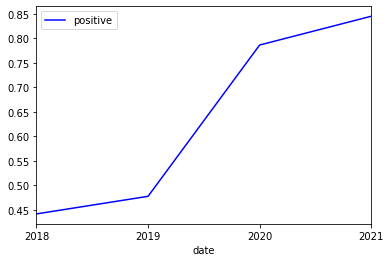

In [111]:
short_tweets['positivity'].resample('A').mean().plot(color= 'b', label= 'positive').legend()

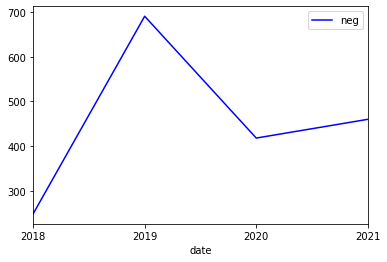

In [112]:
short_tweets['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend()

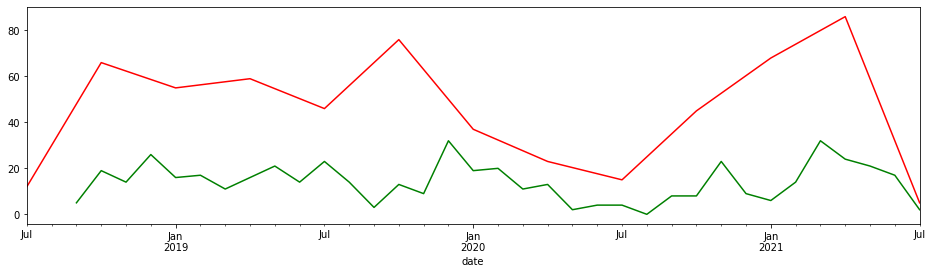

In [113]:
ax = short_tweets['anger'].resample('Q').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

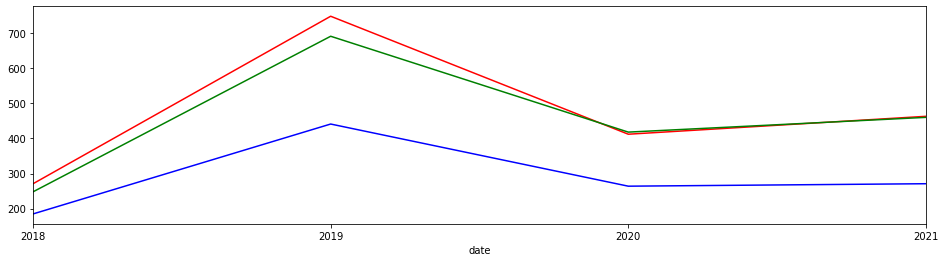

In [114]:
ax = short_tweets['positivity'].resample('A').sum().plot(figsize=(16,4), color = 'red')
short_tweets['negative'].resample('A').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['trust'].resample('A').sum().plot(figsize=(16,4), ax = ax, color = 'blue')